<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/02_Modelo_Regresion_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal múltiple

Aplicamos un modelo de regresión lineal múltiple para predecir la cantidad de días que un animal puede pasar en un refugio.

Importes necesarios

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

Leemos los datos. Recuerda tener el archivo 'data.csv' cargado en tu entorno de trabajo.

In [ ]:
data = pd.read_csv('data.csv')

Partimos los datos en X e Y.

In [ ]:
x = data.drop(['TimeInShelterDays'], axis = 1)
y = data['TimeInShelterDays']

In [ ]:
def regresion_lineal_multiple(X, y, k=10):
    """
    Entrena un modelo de regresión lineal múltiple usando K-Fold Cross Validation.

    Retorna:
    - Lista de MAE en train por fold
    - Lista de MAE en test por fold
    - Promedio de MAE en train
    - Promedio de MAE en test
    - Desviación estándar de MAE en train
    - Desviación estándar de MAE en test
    - Lista completa de y_test (reales)
    - Lista completa de y_pred (predichos)
    """
    X = np.array(X)
    y = np.array(y)
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    mae_train_scores = []
    mae_test_scores = []
    y_test_all = []
    y_pred_all = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        modelo = LinearRegression()
        modelo.fit(X_train, y_train)

        y_train_pred = modelo.predict(X_train)
        y_test_pred = modelo.predict(X_test)

        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        mae_train_scores.append(mae_train)
        mae_test_scores.append(mae_test)

        y_test_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

        print(f"Fold {fold + 1} - MAE Train: {mae_train:.4f}, MAE Test: {mae_test:.4f}")

    prom_train = np.mean(mae_train_scores)
    prom_test = np.mean(mae_test_scores)
    std_train = np.std(mae_train_scores)
    std_test = np.std(mae_test_scores)

    print(f"\nMAE Promedio Train: {prom_train:.4f} (±{std_train:.4f})")
    print(f"MAE Promedio Test:  {prom_test:.4f} (±{std_test:.4f})")

    return (
        mae_train_scores, mae_test_scores,
        prom_train, prom_test, std_train, std_test,
        y_test_all, y_pred_all
    )


In [ ]:
result = regresion_lineal_multiple(x, y)

Fold 1 - MAE Train: 22.2690, MAE Test: 22.1033
Fold 2 - MAE Train: 22.2545, MAE Test: 22.3543
Fold 3 - MAE Train: 22.2594, MAE Test: 22.2151
Fold 4 - MAE Train: 22.1883, MAE Test: 23.0687
Fold 5 - MAE Train: 22.3292, MAE Test: 21.7485
Fold 6 - MAE Train: 22.2239, MAE Test: 22.7779
Fold 7 - MAE Train: 22.1971, MAE Test: 22.8221
Fold 8 - MAE Train: 22.2177, MAE Test: 22.4194
Fold 9 - MAE Train: 22.1505, MAE Test: 23.2409
Fold 10 - MAE Train: 22.2702, MAE Test: 22.0252

MAE Promedio Train: 22.2360 (±0.0484)
MAE Promedio Test:  22.4775 (±0.4588)


In [ ]:
def graficar_predicciones(y_real, y_predicho, cantidad_muestras):
    """
    Muestra una gráfica comparando los valores reales y predichos.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_real[:cantidad_muestras], label='Valor real', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_predicho[:cantidad_muestras], label='Valor predicho', marker='x', linestyle='--', alpha=0.7)
    plt.title('Comparación entre valores reales y predichos')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


La varianza de los y reales es:  662.2305195393601
La varianza de los y predichos es:  4.906422606511232


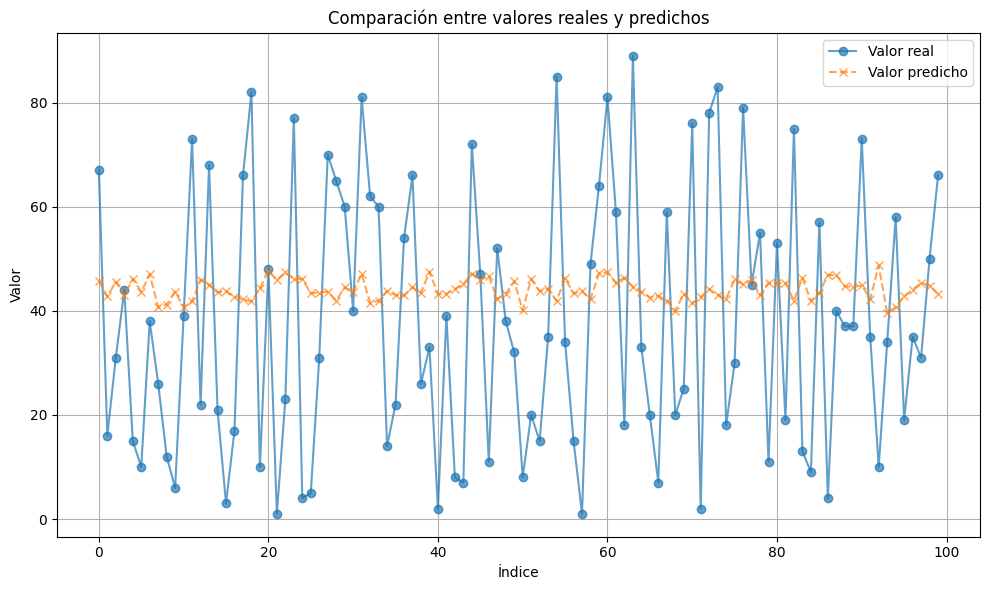

np.float64(25.733829874311365)

In [ ]:
y_real, y_pred = result[-2], result[-1]
print("La varianza de los y reales es: ",np.var(y_real))
print("La varianza de los y predichos es: ",np.var(y_pred))
graficar_predicciones(y_real, y_pred, 100)
np.sqrt(662.23)

Como podemos ver en la gráfica, tenemos un problema de sub-ajuste. Probablemente a que el modelo no tiene la complejidad necesaria para adaptarse al patrón de los datos o con la cantidad de muestras que tenemos, no alcanza para ajustar de mejor manera los pesos del polinomio de la regresión.